# Projeto 3 - Previsão de Rendimentos

O conjunto de dados lista informações gerais de alguns adultos.

Objetivo: Analisar os dados e construir modelos de previsão utilizando linguagem Python.

Fonte do dataset: https://www.kaggle.com/datasets/sohaibanwaar1203/adultscsv

In [1]:
#Versão da Linguagem Python
from platform import python_version
print("Versão python utilizada neste projeto: ", python_version())

Versão python utilizada neste projeto:  3.9.13


In [2]:
#Instala o pacote watermark. 
!pip install -q -U watermark

In [3]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
# Parâmetros de configuração dos gráficos
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [5]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark --iversions

numpy     : 1.21.5
matplotlib: 3.5.2
pandas    : 1.4.4
seaborn   : 0.11.2



Carregando o Dataset

In [6]:
#Carregando o  dataset
df = pd.read_csv('adult_data.csv')

In [7]:
# Verificando o tipo do objeto
type(df)

pandas.core.frame.DataFrame

In [8]:
#Verificando quantas linhas e colunas tem o dataset
df.shape

(48842, 16)

In [9]:
#Total de registros considerando cada coluna
df.size

781472

In [10]:
#Verifica os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   x                48842 non-null  int64 
 1   age              48842 non-null  int64 
 2   workclass        48842 non-null  object
 3   fnlwgt           48842 non-null  int64 
 4   education        48842 non-null  object
 5   educational-num  48842 non-null  int64 
 6   marital-status   48842 non-null  object
 7   occupation       48842 non-null  object
 8   relationship     48842 non-null  object
 9   race             48842 non-null  object
 10  gender           48842 non-null  object
 11  capital-gain     48842 non-null  int64 
 12  capital-loss     48842 non-null  int64 
 13  hours-per-week   48842 non-null  int64 
 14  native-country   48842 non-null  object
 15  income           48842 non-null  object
dtypes: int64(7), object(9)
memory usage: 6.0+ MB


In [11]:
#Amostra das 5 primeiras linhas
df.head(5)

,x,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,1,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,2,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,3,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,4,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,5,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [12]:
#Amostra das 5 últimas linhas
df.tail()

,x,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,48838,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,48839,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,48840,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,48841,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,48842,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [13]:
#Colunas dos conjunto de dados
df.columns

Index(['x', 'age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [14]:
#Método value_counts() para cada tipo de dado
df.dtypes.value_counts()

object    9
int64     7
dtype: int64

In [15]:
#Verificando o tipo de dado de cada coluna
df.dtypes

x                   int64
age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [16]:
#Verificando se há registros duplicados
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48837    False
48838    False
48839    False
48840    False
48841    False
Length: 48842, dtype: bool

In [17]:
#Verificando se há valores ausentes
df.isnull().sum()

x                  0
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Perguntas

1- Qual a quantidade de pessoas por tipo de educação?

In [18]:
#Filtrando por tipo de educação e calculando as quantidades de pessoas por tipo
df1 = df['education'].value_counts()
print(df1)

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64


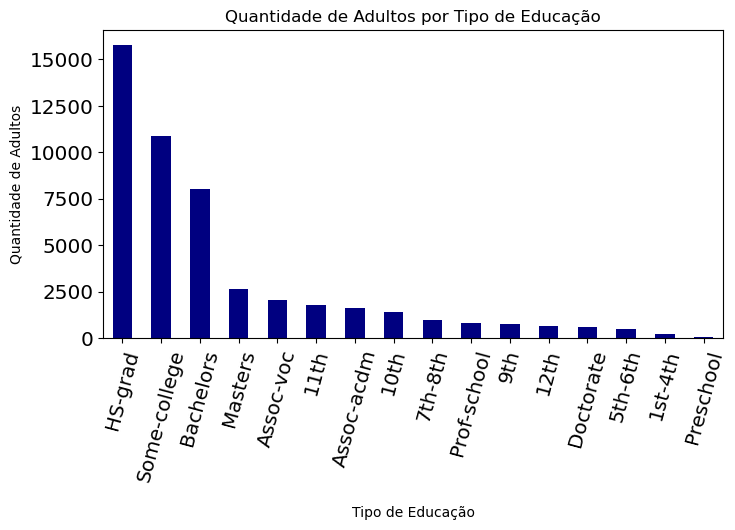

In [19]:
#Gráfico com matplotlib
df1.plot(kind = 'bar', 
                title = 'Quantidade de Adultos por Tipo de Educação',
                ylabel = 'Quantidade de Adultos', 
                xlabel = '\nTipo de Educação',
                colormap = 'jet',
                figsize=(8,4))
plt.xticks(rotation = 75)
plt.show()

2- Qual a quantidade de indivíduos com ganho maior que 50K pela idade?

In [20]:
#Filtrando por ganho maior que 50K
df_maior = df[df['income'] == '>50K']

In [21]:
#Agrupando por idade e calculando a quantidade de pessoas por idade com ganho maior que 50K
df2 = df_maior.groupby('age')['income'].value_counts()
print(df2)

age  income
19   >50K       3
20   >50K       1
21   >50K       6
22   >50K      17
23   >50K      22
               ..
83   >50K       2
84   >50K       1
85   >50K       1
88   >50K       1
90   >50K      13
Name: income, Length: 68, dtype: int64


3- Qual a quantidade de pessoas por cada país natal?

In [22]:
#Filtrando por país natal e calculando as quantidades de pessoas por país natal
df3 = df['native-country'].value_counts()
print(df3)

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [23]:
#Substituindo os valores '?' por NAN (not an number)
df['native-country'].replace('?', np.nan, inplace=True)

In [24]:
#Verificando valores NA
df.isna().sum()

x                    0
age                  0
workclass            0
fnlwgt               0
education            0
educational-num      0
marital-status       0
occupation           0
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [25]:
#Excluindo as linhas que possuem valores NA da coluna 'native-country'
df.dropna(subset=['native-country'], inplace=True)

In [26]:
#Verificando valores NA
df.isna().sum()

x                  0
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [27]:
#Verificando quantas linhas e colunas tem o dataset
df.shape

(47985, 16)

In [28]:
#Refazendo o filtro por país natal e calculando as quantidades de pessoas por país natal
df4 = df['native-country'].value_counts()
print(df4)

United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

4- Quanto adultos possuem salário maior e menor que 50K?

In [29]:
#Filtrando por rendimento e calculando suas quantidades
df_rendimento = df['income'].value_counts()
print(df_rendimento)

<=50K    36518
>50K     11467
Name: income, dtype: int64


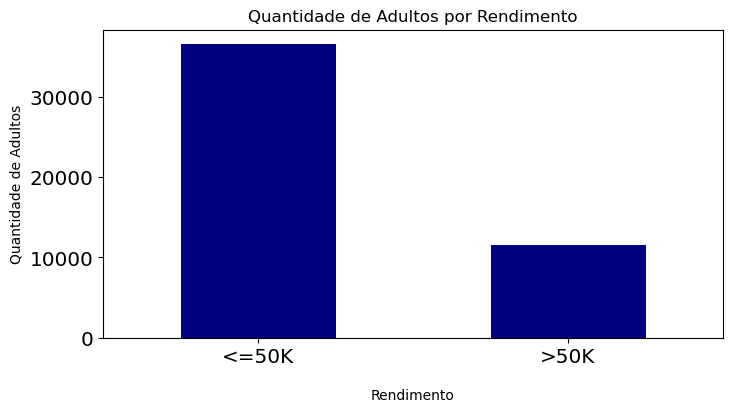

In [30]:
#Gráfico
df_rendimento.plot(kind = 'bar', 
                title = 'Quantidade de Adultos por Rendimento',
                ylabel = 'Quantidade de Adultos', 
                xlabel = '\nRendimento',
                colormap = 'jet',
                figsize=(8,4))
plt.xticks(rotation = 0)
plt.show()

5- Quais as quantidades de adultos por tipo de trabalho?

In [31]:
#Filtrando por tipo de trabalho e calculando suas quantidades
df_trabalho = df['workclass'].value_counts()
print(df_trabalho)

Private             33307
Self-emp-not-inc     3796
Local-gov            3100
?                    2753
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64


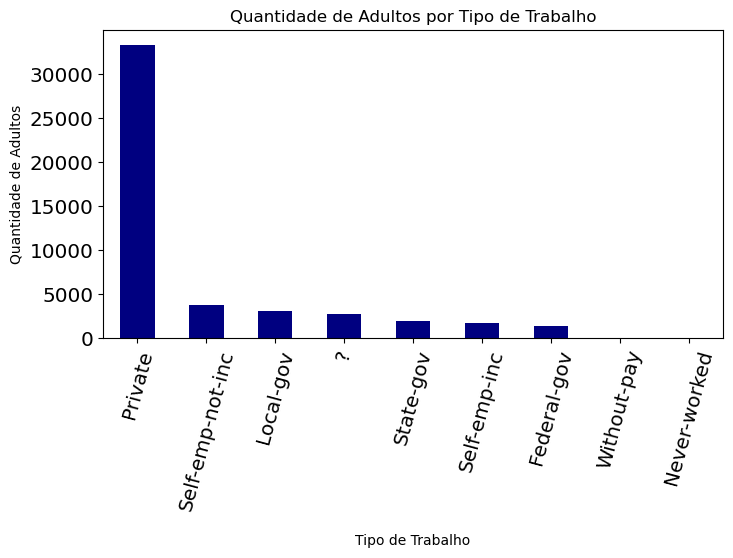

In [32]:
#Gráfico
df_trabalho.plot(kind = 'bar', 
                title = 'Quantidade de Adultos por Tipo de Trabalho',
                ylabel = 'Quantidade de Adultos', 
                xlabel = '\nTipo de Trabalho',
                colormap = 'jet',
                figsize=(8,4))
plt.xticks(rotation = 75)
plt.show()

In [33]:
#Substituindo os valores '?' por NAN (not an number)
df['workclass'].replace('?', np.nan, inplace=True)

In [34]:
#Verificando valores NA
df.isna().sum()

x                     0
age                   0
workclass          2753
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation            0
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country        0
income                0
dtype: int64

In [35]:
#Excluindo as linhas que possuem valores NA da coluna 'workclass'
df.dropna(subset=['workclass'], inplace=True)

In [36]:
#Verificando valores NA
df.isna().sum()

x                  0
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [37]:
#Verificando quantas linhas e colunas tem o dataset
df.shape

(45232, 16)

In [38]:
#Filtrando por tipo de trabalho e calculando suas quantidades
df_trabalho2 = df['workclass'].value_counts()
print(df_trabalho2)

Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64


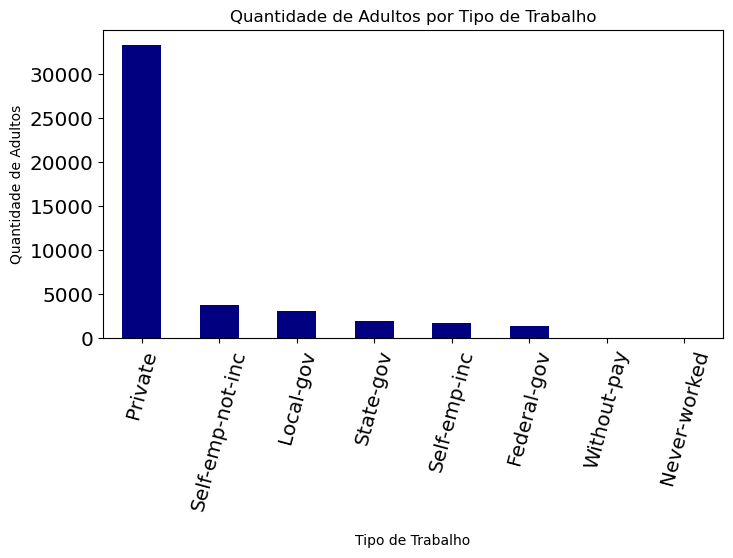

In [39]:
#Gráfico
df_trabalho2.plot(kind = 'bar', 
                title = 'Quantidade de Adultos por Tipo de Trabalho',
                ylabel = 'Quantidade de Adultos', 
                xlabel = '\nTipo de Trabalho',
                colormap = 'jet',
                figsize=(8,4))
plt.xticks(rotation = 75)
plt.show()

6- Como a idade está distribuída por gênero? Utilizar boxplot.

<AxesSubplot:xlabel='gender', ylabel='age'>

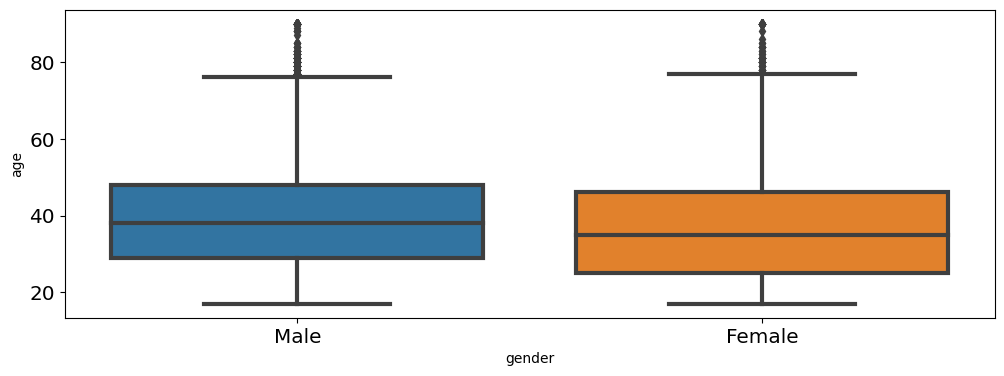

In [40]:
#Gráfico com seaborn
sns.boxplot(x='gender', y='age', data=df)

7- Como a idade está distribuída por rendimento? Utilizar boxplot.

<AxesSubplot:xlabel='income', ylabel='age'>

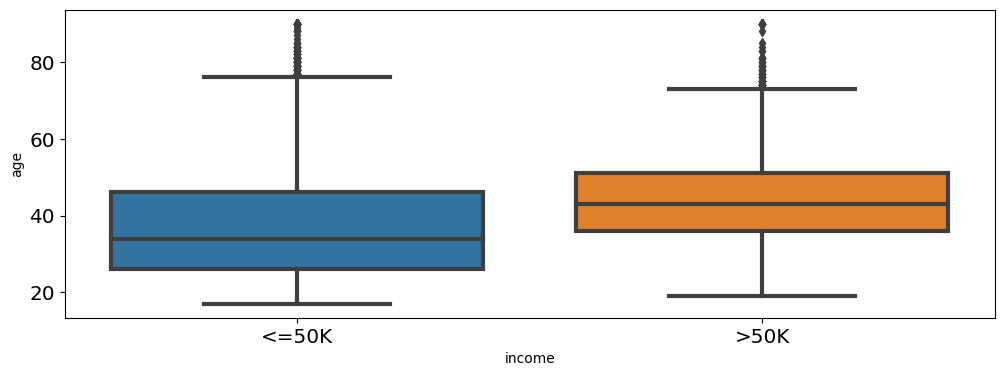

In [41]:
#Gráfico com seaborn
sns.boxplot(x='income', y='age', data=df)

Construção de um modelo de Machine Learning utilizando a técnica de Regressão Logística (usada para prever uma variável categórica binária)

In [42]:
#Convertendo as variáveis categóricas em variáveis numéricas
df = pd.get_dummies(df)

In [43]:
#Verificando as 5 primeiras linhas
df.head()

,x,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K,income_>50K
0,1,25,226802,7,0,0,40,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,2,38,89814,9,0,0,50,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,3,28,336951,12,0,0,40,0,1,0,...,0,0,0,0,0,1,0,0,0,1
3,4,44,160323,10,7688,0,40,0,0,0,...,0,0,0,0,0,1,0,0,0,1
5,6,34,198693,6,0,0,30,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [44]:
#Separando as variáveis dependentes (features) do alvo
X = df.drop('income_>50K', axis=1)  
y = df['income_>50K'] 

In [45]:
#Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
#Criando o modelo de regressão logística
model = LogisticRegression()

In [47]:
#Treinando o modelo
model.fit(X_train, y_train)

LogisticRegression()

In [48]:
#Fazendo previsões nos dados de teste
y_pred = model.predict(X_test)

In [49]:
#Avaliando o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo: {:.2f}%".format(accuracy * 100))

Acurácia do modelo: 79.53%
